<a href="https://colab.research.google.com/github/nchebet09/Naomi-s-Week-8-IP/blob/master/Naomi's_Week_8_IP%2C_Moringa_School_August_6th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Documentation

### a.) Specifying the question

Do the patient's previous symptoms indicate that the patient has hypothyroid?

### b.) Metrics for success

Successfully creating a model that can predict if the patient's previous symptoms indicate that the patient has hypothyroid. To achieve this, we will test our data on different models focusing on decision trees and support vector machines where we will use accuracy scores to evaluate the models.

### c.) Understanding the business context

As a data scientist you are given health data from Nairobi hospital about hypothyroidism. Hypothyroidism is a condition in which thyroid gland does not produce enough of certain crucial hormones. Some of these hormones are triiodothyronine (T3) and thyroxine (T4). The hormones have a big impact on health, affecting the aspects of metabolism and control of vital functions such as body temperature and heart rate. 

As a data scientist, you have been given the responsibility of creating the best model that would predict whether or not the patient's symptoms indicate if that patient has hypothyroid based on the given dataset.

The dataset given contains 3,163 records and 26 columns. The columns are shown below:

#### **Dataset columns**

1. status — hypothyroid positive or negative
2. age — age of patient
3. sex — gender of patient
4. on_thyroxine — is the patient using thyroxine or not
5. query_on_thyroxine — 
6. on_antithyroid_medication
7. thyroid_surgery — have had thyroid surgery or not
8. query_hypothyroid
9. query_hyperthyroid — a condition of producing too much thyroid hormone
10. pregnant — some women could develop hypthyroidism during or after prograncy
11. sick
12. tumor
13. lithium — medication used to treat certain psychiatric disorders can contribute to hypothyroidism
14. goitre — does the patient have goitre or not?
15. TSH_measured
16. TSH — thyroid Stimulating Hormone (test for hypothyroidism, you measure the level of TSH) failure of pituitary gland to produce enough TSH could lead to Hypothyroidism
17. T3_measured — measure of T3 (yes or no)
18. T3 — triiodothyronine (hormone produced by thyroid gland)
19. TT4_measured
20. TT4 — total thyroxine
21. T4U_measured
22. T4U
23. FTI_measured
24. FTI — free thyroxine index
25. TBG_measured
26. TBG — Thyroxine_binding globulin

### d.) Experimental design

The approach for this project will include:

1. Reading material online to better understand hypothyroidism

2. Reading and Initial Data Exploration

3. Data cleaning

4. EDA

5. Impelementing the solution with decision trees and support vector machines

6. Challenging the solution
7. Conclusion

## Importing libraries

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns; sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

## Reading and Initial Data Exploration

In [ ]:
# loading data and previewing the first 5 rows

thyroid_df = pd.read_csv('hypothyroid.csv')
thyroid_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# previewing the tail

thyroid_df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
# checking for the shape

thyroid_df.shape

# our dataset has 3,163 records and 26 columns

(3163, 26)

In [ ]:
# previewing column names

thyroid_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# checking for data types

thyroid_df.dtypes

# all the columns datatypes are listed as object,
# during cleaning we will need to change the columns whose data types have been listed incorrectly

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
# checking for unique values in each column

thyroid_df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [ ]:
# checking for unique values in categorical columns

thyroid_df['status'].unique()
# this is our target variable. it has two categories: hypothyroid and negative

array(['hypothyroid', 'negative'], dtype=object)

In [ ]:
thyroid_df['sex'].unique()

# there is a question mark on sex column that we will need to take care of during cleaning

array(['M', 'F', '?'], dtype=object)

In [ ]:
thyroid_df['on_thyroxine'].unique()

array(['f', 't'], dtype=object)

In [ ]:
thyroid_df['query_on_thyroxine'].unique()

array(['f', 't'], dtype=object)

In [ ]:
thyroid_df['on_antithyroid_medication'].unique()

array(['f', 't'], dtype=object)

In [ ]:
thyroid_df['thyroid_surgery'].unique()

array(['f', 't'], dtype=object)

In [ ]:
thyroid_df['query_hypothyroid'].unique()

array(['f', 't'], dtype=object)

In [ ]:
thyroid_df['query_hyperthyroid'].unique()

array(['f', 't'], dtype=object)

In [ ]:
thyroid_df['pregnant'].unique()

array(['f', 't'], dtype=object)

In [ ]:
thyroid_df['sick'].unique()

array(['f', 't'], dtype=object)

In [ ]:
thyroid_df['tumor'].unique()

array(['f', 't'], dtype=object)

In [ ]:
thyroid_df['lithium'].unique()

array(['f', 't'], dtype=object)

In [ ]:
thyroid_df['goitre'].unique()

array(['f', 't'], dtype=object)

In [ ]:
thyroid_df['TSH_measured'].unique()

array(['y', 'n'], dtype=object)

In [ ]:
thyroid_df['T3_measured'].unique()

array(['y', 'n'], dtype=object)

In [ ]:
thyroid_df['TT4_measured'].unique()

array(['y', 'n'], dtype=object)

In [ ]:
thyroid_df['T4U_measured'].unique()

array(['y', 'n'], dtype=object)

In [ ]:
thyroid_df['FTI_measured'].unique()

array(['y', 'n'], dtype=object)

In [ ]:
thyroid_df['TBG_measured'].unique()

array(['n', 'y'], dtype=object)

In [ ]:
# checking for unique values in numerical columns

thyroid_df['age'].unique()

# we see values as integers except for the question mark which will be taken care of during cleaning

array(['72', '15', '24', '77', '85', '64', '20', '42', '69', '75', '53',
       '59', '68', '50', '78', '65', '28', '43', '40', '84', '?', '83',
       '63', '73', '36', '27', '48', '71', '60', '34', '79', '62', '74',
       '32', '41', '70', '29', '5', '58', '35', '51', '22', '16', '44',
       '39', '47', '18', '17', '88', '56', '30', '45', '66', '52', '54',
       '80', '33', '38', '92', '67', '46', '13', '89', '61', '49', '26',
       '57', '31', '90', '81', '25', '37', '76', '87', '23', '55', '86',
       '98', '21', '97', '1', '6', '14', '82', '11', '19', '9', '12',
       '10', '8', '7', '4', '93'], dtype=object)

In [ ]:
thyroid_df['T3'].unique()

# all the records are floats except for the question. it will be handled during cleaning

array(['0.60', '1.70', '0.20', '0.40', '1.20', '1.10', '1.30', '1.90',
       '?', '0.80', '2.20', '1.50', '2.70', '2', '0.30', '2.10', '0.50',
       '0.70', '1', '1.40', '2.30', '2.40', '0.90', '1.80', '0', '2.80',
       '1.60', '6.70', '3.30', '3', '2.50', '2.60', '4', '9.80', '3.90',
       '3.40', '3.80', '4.50', '3.20', '3.70', '4.30', '2.90', '3.10',
       '3.50', '3.60', '6.60', '4.90', '8.90', '4.10', '5', '5.30',
       '7.60', '7.30', '4.20', '4.40', '5.10', '7', '0.10', '0.05',
       '4.70', '6.20', '5.50', '4.60', '6.10', '8.10', '5.20', '5.60',
       '4.80', '10.20', '8.60'], dtype=object)

In [ ]:
thyroid_df['TT4'].unique()

# all the values are integers except for question mark which will be handled during cleaning

array(['15', '19', '4', '6', '57', '27', '54', '34', '39', '7.60', '53',
       '38', '98', '44', '37', '81', '13', '17', '12', '50', '23', '14',
       '3.90', '52', '32', '30', '84', '10', '55', '24', '28', '11',
       '6.60', '31', '33', '41', '9', '78', '42', '8.10', '65', '16',
       '9.70', '46', '22', '61', '2.30', '21', '7.50', '18', '66', '25',
       '43', '2', '3', '58', '59', '71', '74', '56', '40', '20', '48',
       '230', '70', '4.10', '63', '5.30', '2.90', '62', '75', '68', '45',
       '47', '36', '80', '109', '8.60', '83', '82', '101', '76', '103',
       '112', '206', '110', '93', '79', '121', '?', '107', '88', '187',
       '254', '115', '113', '260', '117', '164', '97', '64', '129', '111',
       '106', '95', '87', '105', '90', '67', '134', '35', '193', '143',
       '130', '108', '86', '96', '92', '99', '216', '152', '125', '138',
       '194', '91', '120', '102', '170', '126', '116', '140', '94', '159',
       '85', '210', '89', '151', '247', '139', '153', '178

In [ ]:
thyroid_df['T4U'].unique()

# we see majority of the values are floats,
# but we also have a few integers and the presence of the question mark which will be handled during cleaning

array(['1.48', '1.13', '1', '1.04', '1.28', '1.19', '0.86', '1.05',
       '1.21', '1.02', '0.92', '1.29', '0.98', '1.08', '1.01', '1.18',
       '1.10', '1.27', '0.83', '1.11', '0.78', '1.39', '1.12', '0.93',
       '0.99', '0.90', '1.06', '0.68', '0.67', '1.14', '0.80', '0.96',
       '0.95', '1.46', '1.03', '0.97', '0.94', '1.09', '1.24', '1.23',
       '1.53', '1.26', '1.40', '1.17', '0.87', '0.61', '0.70', '1.07',
       '1.73', '1.45', '1.20', '0.89', '0.84', '0.91', '0.85', '1.35',
       '0.82', '1.50', '0.74', '1.71', '1.79', '0.73', '0.77', '1.25',
       '?', '0.88', '0.72', '0.31', '0', '0.79', '0.81', '0.71', '1.93',
       '1.32', '0.66', '1.68', '1.42', '1.70', '1.83', '1.41', '1.34',
       '1.65', '1.22', '0.75', '1.74', '0.69', '1.51', '0.76', '1.16',
       '0.35', '0.62', '0.54', '1.36', '1.33', '1.30', '0.48', '1.59',
       '1.75', '1.86', '1.38', '1.43', '1.62', '2.01', '0.30', '1.31',
       '1.15', '1.57', '0.55', '1.66', '0.52', '1.97', '1.47', '0.36',
       

In [ ]:
thyroid_df['FTI'].unique()

# there is a combination of floats and integers. we will convert the integers to float during cleaning.
# we also have question mark as a unique value, we will handle this during cleaning.

array(['10', '17', '0', '6', '44', '23', '63', '32', '7.50', '61', '41',
       '76', '45', '34', '81', '11', '16', '46', '22', '12', '5', '47',
       '29', '37', '60', '8.40', '8.50', '24', '28', '7', '49', '36',
       '15', '9', '80', '53', '7.20', '68', '6.60', '48', '21', '14', '2',
       '20', '1.40', '56', '3', '51', '13', '43', '78', '52', '64', '26',
       '35', '31', '133', '3.40', '54', '8.90', '57', '5.50', '58', '55',
       '2.80', '66', '4', '40', '50', '8.70', '87', '89', '112', '123',
       '99', '92', '104', '69', '196', '107', '106', '74', '97', '?',
       '122', '84', '114', '124', '241', '119', '120', '136', '85', '127',
       '839', '137', '197', '96', '77', '108', '82', '72', '94', '91',
       '240', '121', '109', '79', '100', '98', '73', '117', '165', '103',
       '88', '101', '126', '132', '128', '143', '152', '141', '186',
       '113', '102', '125', '93', '105', '159', '188', '71', '149', '116',
       '83', '176', '161', '86', '140', '111', '158', '1

In [ ]:
thyroid_df['TBG'].unique()

# TBG consists of a question mark (to be handled during cleaning) and the rest are integers

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

After checking the unique values in all the columns, let's check what is the total number of records that have question marks in all the columns. See the code below.

In [ ]:
print(thyroid_df[thyroid_df == '?'].count())

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64


Here are the records that have question marks with the total number of question marks in each column.

age = 446

sex = 73

TSH = 468

T3 = 695

TT4 = 249

T4U = 248

FTI = 247

TBG = 2,903

Based on these observations, we quickly notice that TBG has the most question marks. It's total number of records with question marks is more than 75% of the total records. We will delete this column given that the records with question marks is too many and it doesn't make sense to impute more than 75% of the records.

As for the other records with question marks, we will find a way to deal with the question marks by either imputing them or deleting them if it doesn't make sense to impute.




In [ ]:
# I am interested to see the total number of records for each category (negative and hypothyroid) in 
# status column. 

thyroid_df[thyroid_df['status']=='negative'].shape

# we see that the records that have status equal to negative is 3,012

(3012, 26)

In [ ]:
thyroid_df[thyroid_df['status']=='hypothyroid'].shape
# records that have hypothyroid on status column equals to 151

(151, 26)

## Data cleaning  

In [ ]:
# checking for completeness. Are there any missing values in our dataset?

print(thyroid_df.isnull().sum())

# there are no missing values in our dataset

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64


In [ ]:
# checking for duplicates (consitency)

thyroid_df.duplicated().value_counts()
# we see 77 listed records as duplicates, let's explore further in the next cell

False    3086
True       77
dtype: int64

In [ ]:
# exploring further on the duplicated records
duplicated = thyroid_df[thyroid_df.duplicated()]
duplicated

# given that we dont have a unique ID, it's hard to tell if these columns are actually duplicated. 
# All the records shown below are different, hence we wont be deleting any of these records.

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


In [ ]:
# Next we drop TBG column, this is the column with more than 75% records as question marks
# we will also drop TBG_measured since it's related to TBG. With TBG missing a lot of values TBG_measured shows the same 
# so we wont be needed these two columns and will drop them here

thyroid_df.drop(['TBG', 'TBG_measured'],axis=1, inplace=True)

In [ ]:
# confirming that TBG has been dropped
thyroid_df.columns

# TBG has been dropped

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [ ]:
thyroid_df.shape

(3163, 24)

In [ ]:
# during the data initial exploration we saw that all the columns were listed as objects, but they are not all objects.
# in this section we will convert the columns to their appropriate datatypes.
# let's start by converting categorical variables to category

thyroid_df['status'] = thyroid_df['status'].astype('category')
thyroid_df['sex'] = thyroid_df['sex'].astype('category')
thyroid_df['on_thyroxine'] = thyroid_df['on_thyroxine'].astype('category')
thyroid_df['query_on_thyroxine'] = thyroid_df['query_on_thyroxine'].astype('category')
thyroid_df['on_antithyroid_medication'] = thyroid_df['on_antithyroid_medication'].astype('category')
thyroid_df['thyroid_surgery'] = thyroid_df['thyroid_surgery'].astype('category')
thyroid_df['query_hypothyroid'] = thyroid_df['query_hypothyroid'].astype('category')

thyroid_df['query_hyperthyroid'] = thyroid_df['query_hyperthyroid'].astype('category')
thyroid_df['pregnant'] = thyroid_df['pregnant'].astype('category')
thyroid_df['sick'] = thyroid_df['sick'].astype('category')
thyroid_df['tumor'] = thyroid_df['tumor'].astype('category')
thyroid_df['lithium'] = thyroid_df['lithium'].astype('category')
thyroid_df['goitre'] = thyroid_df['goitre'].astype('category')
thyroid_df['TSH_measured'] = thyroid_df['TSH_measured'].astype('category')

thyroid_df['T3_measured'] = thyroid_df['T3_measured'].astype('category')
thyroid_df['TT4_measured'] = thyroid_df['TT4_measured'].astype('category')
thyroid_df['T4U_measured'] = thyroid_df['T4U_measured'].astype('category')
thyroid_df['FTI_measured'] = thyroid_df['FTI_measured'].astype('category')



In [ ]:
# confirming that the categorical variables have been converted to category datatypes

thyroid_df.dtypes

# yes they have

status                       category
age                            object
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                            object
T3_measured                  category
T3                             object
TT4_measured                 category
TT4                            object
T4U_measured                 category
T4U                            object
FTI_measured                 category
FTI                            object
dtype: object

In [ ]:
# let's convert numerical variables to numerical datatypes and replace question marks nan
thyroid_df['age'] = pd.to_numeric(thyroid_df['age'], errors = 'coerce') #‘coerce’ converts invalid parsing in this case '?' to NaN.
thyroid_df['TSH'] = pd.to_numeric(thyroid_df['TSH'], errors = 'coerce')
thyroid_df['T3'] = pd.to_numeric(thyroid_df['T3'], errors = 'coerce')
thyroid_df['TT4'] = pd.to_numeric(thyroid_df['TT4'], errors = 'coerce')
thyroid_df['T4U'] = pd.to_numeric(thyroid_df['T4U'], errors = 'coerce')
thyroid_df['FTI'] = pd.to_numeric(thyroid_df['FTI'], errors = 'coerce')

print(thyroid_df.dtypes)
# we see that all the columns have been converted to float, but some of the columns are not floats. 
# We will change the non-float columns to appropriate datatypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
dtype: object


In [ ]:
# checking for null values
print(thyroid_df.isnull().sum())

status                         0
age                          446
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
dtype: int64


In [ ]:
# dropping the null values.

thyroid_df.dropna(inplace=True)

In [ ]:
# confirming that the missing values have been dropped

print(thyroid_df.isnull().sum())

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64


In [ ]:
# earlier we had seen that age, and TT4 were listed as floats but they are integers. we will fix that here

thyroid_df['age'] = thyroid_df['age'].astype(int)
thyroid_df['TT4'] = thyroid_df['TT4'].astype(int)

In [ ]:
# checking if all the columns have the correct data types

thyroid_df.dtypes

status                       category
age                             int64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                             int64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
dtype: object

In [ ]:
#  let's check if we still have any columns with question marks

print(thyroid_df[thyroid_df == '?'].count())

# all the columns have no question marks except for the sex column. we will take care of this next

status                        0
age                           0
sex                          12
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
dtype: int64


In [ ]:
# the sex column has only 12 records with '?', we will drop these records to avoid any errors during the analysis

df = thyroid_df.loc[thyroid_df['sex']=='?']
print(df)
thyroid_df = thyroid_df.drop([402, 721, 984, 1337, 1675, 1739, 1863, 2077, 2080, 2107, 2595, 2895], axis ='index')

        status  age sex on_thyroxine  ... T4U_measured   T4U FTI_measured    FTI
402   negative   42   ?            t  ...            y  1.02            y  126.0
721   negative   46   ?            t  ...            y  0.91            y  162.0
984   negative   37   ?            f  ...            y  1.05            y  134.0
1337  negative   38   ?            f  ...            y  0.83            y  104.0
1675  negative   27   ?            f  ...            y  0.95            y   99.0
1739  negative   64   ?            f  ...            y  0.85            y  110.0
1863  negative   38   ?            f  ...            y  0.70            y  117.0
2077  negative   47   ?            f  ...            y  1.31            y   78.0
2080  negative   55   ?            f  ...            y  0.89            y   92.0
2107  negative   65   ?            f  ...            y  0.77            y  168.0
2595  negative   18   ?            t  ...            y  1.12            y  107.0
2895  negative   46   ?     

In [ ]:
# confirming that the rows in the sex columns with question marks have been dropped
print(thyroid_df[thyroid_df == '?'].count())

# checking the current shape of our data frame
print(thyroid_df.shape)
# our data set has 2,000 records and 24 columns 

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64
(2000, 24)


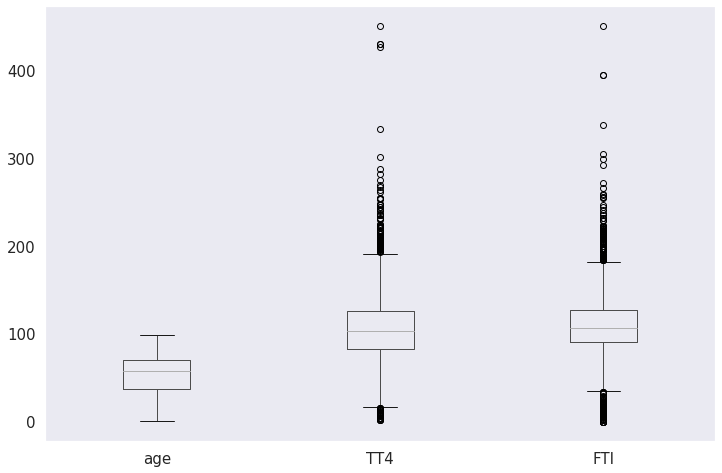

In [ ]:
# checking for outliers in numerical variables
# plotting boxplots for age, TT4 and FTI
thyroid_df.boxplot(['age', 'TT4', 'FTI'], grid=False, figsize=(12,8), fontsize=15)

Age has no outliers. TT4 and FTI have some outliers but based in research we establish that it is possible to have very high or low levels of TT4 and FTI so we wont be deleting these outliers

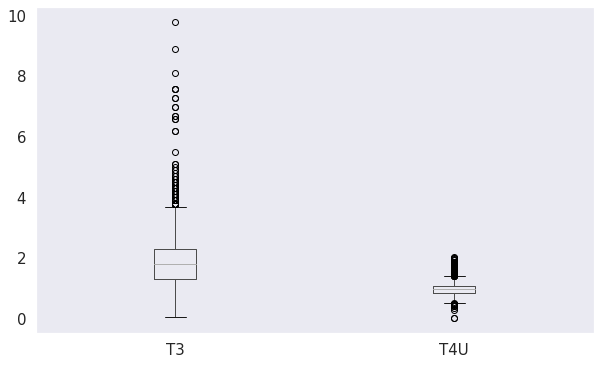

In [ ]:
# plotting boxplots for T3 and T4U
thyroid_df.boxplot(['T3', 'T4U'], grid=False, figsize=(10,6), fontsize=15)

We see some outliers on both columns, but we will keep them as well

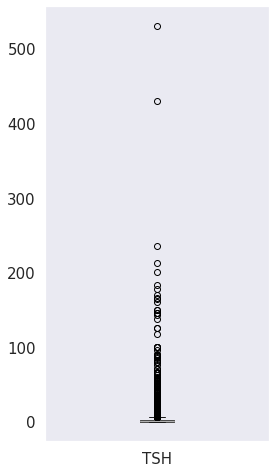

In [ ]:
# plotting boxplots for TSH
thyroid_df.boxplot(['TSH'], grid=False, figsize=(4,8), fontsize=15)

There are outliers, and we have two points that are clearly away from the rest. These two points might affect our data so we will get rid of them

In [ ]:
thyroid_df[thyroid_df['TSH']>300]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6,y,1.04,y,6.0
31,hypothyroid,59,F,f,f,f,f,f,f,f,f,f,f,f,y,530.0,y,2.0,y,10,y,1.12,y,8.5


In [ ]:
# dropping the records

thyroid_df = thyroid_df.drop([3, 31], axis ='index')
# confirming that the records have been dropped
thyroid_df[thyroid_df['TSH']>300]

# yes the two records have been dropped

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI


In [ ]:
# checking the final shape of our dataset

thyroid_df.shape

# we are remaining with 1,998 records and 24 columns. we are ready to begin on the analysis

(1998, 24)

In [ ]:
# renaming the cleaned

cleaned = thyroid_df
cleaned.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15,y,1.48,y,10.0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19,y,1.13,y,17.0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4,y,1.00,y,0.0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44.0
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138.0,y,1.1,y,27,y,1.19,y,23.0


## Exploratory data analysis

### Univariate analysis

In [ ]:
# checking the statistical summary of the cleaned data
cleaned.describe()

,age,TSH,T3,TT4,T4U,FTI
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,53.634635,5.617853,1.925626,107.461962,0.987948,110.221121
std,19.300477,19.372810,0.970409,44.964531,0.231642,40.994681
min,1.000000,0.000000,0.050000,2.000000,0.000000,0.000000
25%,37.000000,0.000000,1.300000,82.000000,0.850000,90.000000
50%,57.000000,0.700000,1.800000,103.000000,0.960000,107.000000
75%,70.000000,2.200000,2.300000,126.000000,1.070000,127.000000
max,98.000000,235.000000,9.800000,450.000000,2.030000,450.000000


observations: 

mean age = 53.6, , 50% = 57, max = 98

mean TSH = 5.61, 50% =0.7, max = 235. the disperity here is very obvious suggesting the presence of skewness

mean T3 = 1.925, 50% = 1.8, max = 9.8. there is a huge disperity between 50% and max, also an indication of skewness

mean TT4 = 107.46, 50% = 103, max = 450

mean T4U =0.98, 50% = 0.96, max = 2.03. 

mean FTI = 110.22, 50% = 107, max = 450. also showing signs of skewness

#### Frequency distribution tables

In [ ]:
cleaned['status'].value_counts()

# we see that we have 1,878 negative cases and 120 cases of hypothyroid

negative       1878
hypothyroid     120
Name: status, dtype: int64

In [ ]:
cleaned['age'].value_counts().head(10)

# the ages shown below on the left are the most popular ages that participated in this study
# we see mostly older folks

60    53
70    51
62    51
72    50
73    47
59    44
58    44
71    42
28    42
34    40
Name: age, dtype: int64

In [ ]:
cleaned['sex'].value_counts()

# there is more female patients than male. 
# it is likely that our data will be skewed towards female because we have more data from female patients

F    1359
M     639
?       0
Name: sex, dtype: int64

In [ ]:
cleaned['on_thyroxine'].value_counts()

# a lot of patients are not on thyroxine. 1,742 not on thyroxine but only 256 on thyroxine

f    1742
t     256
Name: on_thyroxine, dtype: int64

In [ ]:
cleaned['on_antithyroid_medication'].value_counts()

# only 27 patients are on antithyroid medication

f    1971
t      27
Name: on_antithyroid_medication, dtype: int64

In [ ]:
cleaned['thyroid_surgery'].value_counts()

# 72 patients have had thyroid surgery

f    1926
t      72
Name: thyroid_surgery, dtype: int64

In [ ]:
cleaned['pregnant'].value_counts()

# 50 patients are pregnant

f    1948
t      50
Name: pregnant, dtype: int64

In [ ]:
cleaned['sick'].value_counts()
# 82 patients participating in the study are sick

f    1916
t      82
Name: sick, dtype: int64

In [ ]:
cleaned['tumor'].value_counts()

# 25 of the patients participating in the clinical study have a tumor

f    1973
t      25
Name: tumor, dtype: int64

In [ ]:
cleaned['lithium'].value_counts()

# only two patients are on lithium

f    1996
t       2
Name: lithium, dtype: int64

In [ ]:
cleaned['goitre'].value_counts()

# 53 of the patients have goitre

f    1945
t      53
Name: goitre, dtype: int64

#### distribution plots for numerical variables

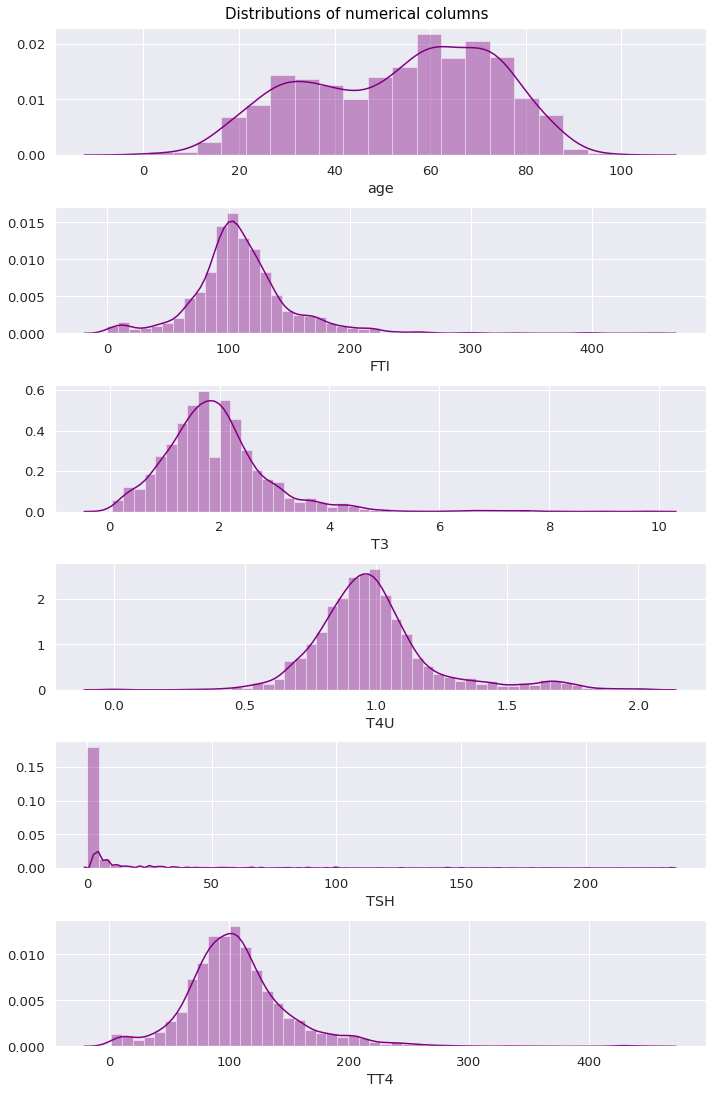

In [ ]:
dist_columns = ['age', 'FTI', 'T3', 'T4U', 'TSH', 'TT4']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(dist_columns), figsize = (10, 15))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), cleaned, dist_columns):
  sns.distplot(cleaned[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

# observations: 
# age shows a bimodal distribution
# FTI and T3 shoes a bit or more than trimodal distribution with a thin curve and some skewness to the right
# T4U is a shows some bimodal distribution with majority of the data being normally distributed
# TSH is heavily skewed to the right
# TT4 is normally distributed



### Bivariate analysis

#### Heatmap

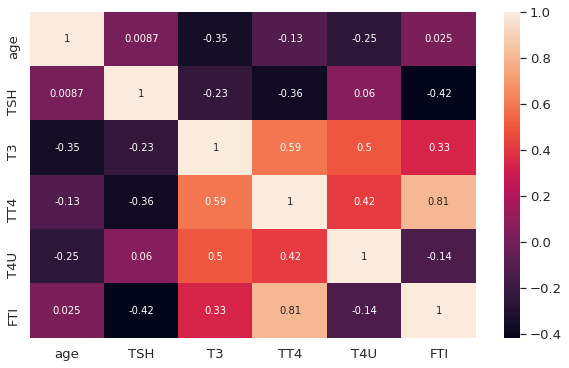

In [ ]:
# checking for correlations in numerical variables

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cleaned.corr(), annot=True, ax=ax);

we see that generally the numerical variables shows moderate to strong positive and negative correlation among each other. some have week negative correlation e.g T4U to FTI and age to TT4. let's explore this further by plotting pair plots below.

#### Pairplots

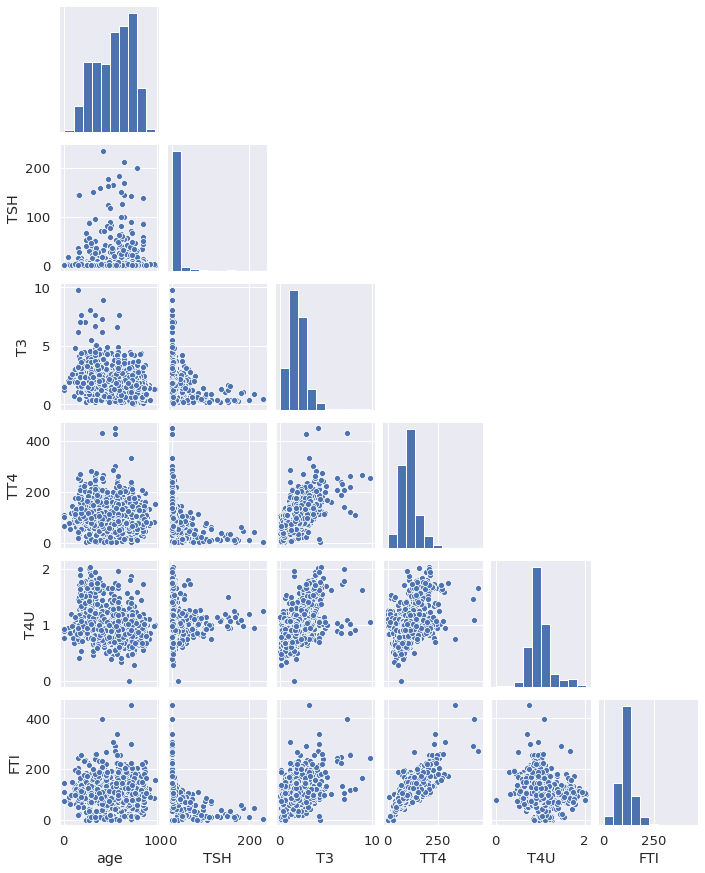

In [ ]:
sns.pairplot(cleaned, corner=True, aspect=0.8, height=2)
# sns.pairplot(numerical_df, corner = True)

TT4 and FTI are the only variables that shows a clear linear correlation between each other

Age to other variables shows week correlations

#### Barcharts comparing the target with features variables

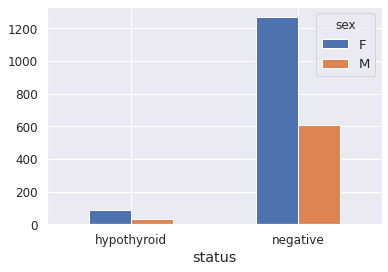

In [ ]:
pd.crosstab(cleaned['status'], cleaned['sex']).plot(kind='bar', rot=0, fontsize=12)

# the chart shows that more female have hypothyroid compared to male
# we also see that more female tested negative
# this observations are not surprising because earlier we had seen that more females participated in this study than males

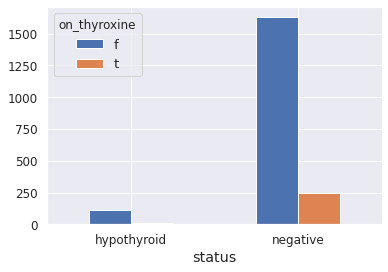

In [ ]:
pd.crosstab(cleaned['status'], cleaned['on_thyroxine']).plot(kind='bar', rot=0, fontsize=12)

# only males who test negative are on thyroxine

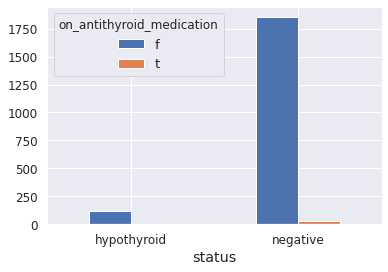

In [ ]:
pd.crosstab(cleaned['status'], cleaned['on_antithyroid_medication']).plot(kind='bar', rot=0, fontsize=12)
# a few males who test negative are on antithyroid medication

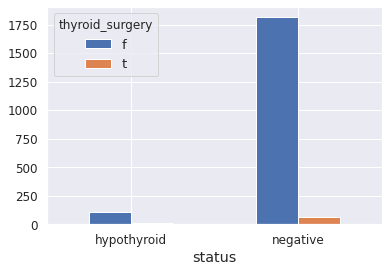

In [ ]:
pd.crosstab(cleaned['status'], cleaned['thyroid_surgery']).plot(kind='bar', rot=0, fontsize=12)

# a few patients that tested negative have had a thyroid surgery

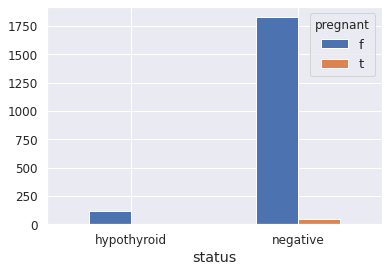

In [ ]:
pd.crosstab(cleaned['status'], cleaned['pregnant']).plot(kind='bar', rot=0, fontsize=12)
# a few patients who tested negative are pregnant

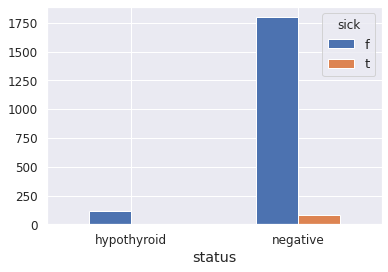

In [ ]:
pd.crosstab(cleaned['status'], cleaned['sick']).plot(kind='bar', rot=0, fontsize=12)

# some patients who tested negative are sick

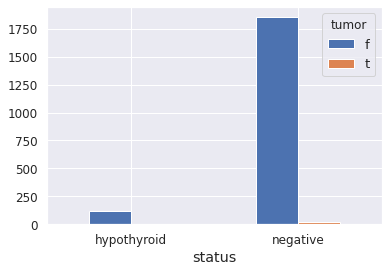

In [ ]:
pd.crosstab(cleaned['status'], cleaned['tumor']).plot(kind='bar', rot=0, fontsize=12)

# a small number of patients who tested negative have a tumor as shown in the graph

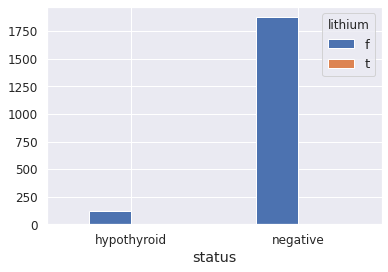

In [ ]:
pd.crosstab(cleaned['status'], cleaned['lithium']).plot(kind='bar', rot=0, fontsize=12)

# no patient who tested for hypothyroid or negative uses lithium

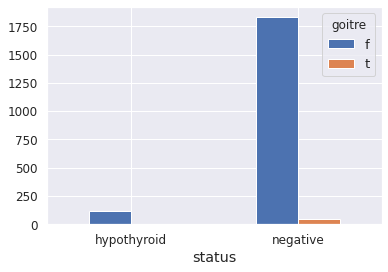

In [ ]:
pd.crosstab(cleaned['status'], cleaned['goitre']).plot(kind='bar', rot=0, fontsize=12)

# a few patients who tested negative have goitre

## Implementing the solution

### Decision trees

#### Data preprocessing before modeling

In [ ]:
# we know that most of the categorical columns are in string format,
# so we need to be encode the data to numerical before we begin modeling
# we will use label encoding (.cat.codes)

cleaned['status'] = cleaned['status'].cat.codes
cleaned['sex'] = cleaned['sex'].cat.codes
cleaned['on_thyroxine'] = cleaned['on_thyroxine'].cat.codes
cleaned['query_on_thyroxine'] = cleaned['query_on_thyroxine'].cat.codes
cleaned['on_antithyroid_medication'] = cleaned['on_antithyroid_medication'].cat.codes
cleaned['thyroid_surgery'] = cleaned['thyroid_surgery'].cat.codes
cleaned['query_hypothyroid'] = cleaned['query_hypothyroid'].cat.codes
cleaned['query_hyperthyroid'] = cleaned['query_hyperthyroid'].cat.codes
cleaned['pregnant'] = cleaned['pregnant'].cat.codes

cleaned['sick'] = cleaned['sick'].cat.codes
cleaned['tumor'] = cleaned['tumor'].cat.codes
cleaned['lithium'] = cleaned['lithium'].cat.codes
cleaned['goitre'] = cleaned['goitre'].cat.codes
cleaned['TSH_measured'] = cleaned['TSH_measured'].cat.codes
cleaned['T3_measured'] = cleaned['T3_measured'].cat.codes
cleaned['TT4_measured'] = cleaned['TT4_measured'].cat.codes
cleaned['T4U_measured'] = cleaned['T4U_measured'].cat.codes
cleaned['FTI_measured'] = cleaned['FTI_measured'].cat.codes


In [ ]:
# checking for data types. 
cleaned.dtypes

# we see that the categorical columns have been converted to integers but as int8 and not int 64. let's fix that

status                          int8
age                            int64
sex                             int8
on_thyroxine                    int8
query_on_thyroxine              int8
on_antithyroid_medication       int8
thyroid_surgery                 int8
query_hypothyroid               int8
query_hyperthyroid              int8
pregnant                        int8
sick                            int8
tumor                           int8
lithium                         int8
goitre                          int8
TSH_measured                    int8
TSH                          float64
T3_measured                     int8
T3                           float64
TT4_measured                    int8
TT4                            int64
T4U_measured                    int8
T4U                          float64
FTI_measured                    int8
FTI                          float64
dtype: object

In [ ]:
# converting int8 to int64

cleaned['status'] = cleaned['status'].astype('int64')
cleaned['sex'] = cleaned['sex'].astype('int64')
cleaned['on_thyroxine'] = cleaned['on_thyroxine'].astype('int64')
cleaned['query_on_thyroxine'] = cleaned['query_on_thyroxine'].astype('int64')
cleaned['on_antithyroid_medication'] = cleaned['on_antithyroid_medication'].astype('int64')
cleaned['thyroid_surgery'] = cleaned['thyroid_surgery'].astype('int64')
cleaned['query_hypothyroid'] = cleaned['query_hypothyroid'].astype('int64')
cleaned['query_hyperthyroid'] = cleaned['query_hyperthyroid'].astype('int64')
cleaned['pregnant'] = cleaned['pregnant'].astype('int64')

cleaned['sick'] = cleaned['sick'].astype('int64')
cleaned['tumor'] = cleaned['tumor'].astype('int64')
cleaned['lithium'] = cleaned['lithium'].astype('int64')
cleaned['goitre'] = cleaned['goitre'].astype('int64')
cleaned['TSH_measured'] = cleaned['TSH_measured'].astype('int64')
cleaned['T3_measured'] = cleaned['T3_measured'].astype('int64')
cleaned['TT4_measured'] = cleaned['TT4_measured'].astype('int64')
cleaned['T4U_measured'] = cleaned['T4U_measured'].astype('int64')
cleaned['FTI_measured'] = cleaned['FTI_measured'].astype('int64')

In [ ]:
# confirming that all the data is in the right format before we begin analysis
cleaned.dtypes

status                         int64
age                            int64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                            int64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
dtype: object

In [ ]:
cleaned.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,0,72,2,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15,1,1.48,1,10.0
1,0,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19,1,1.13,1,17.0
2,0,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4,1,1.00,1,0.0
4,0,77,2,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57,1,1.28,1,44.0
5,0,85,1,0,0,0,0,1,0,0,0,0,0,0,1,138.0,1,1.1,1,27,1,1.19,1,23.0


#### Random forest

In [ ]:
# splitting data into features and label

features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']
X = cleaned[features].values
y = cleaned['status'].values
# training data using 80% of our data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# assigning number of trees to use to a variable
target_number_of_trees =100
# fitting to random forest classifier
forest = RandomForestClassifier(n_estimators = target_number_of_trees, random_state=42, min_samples_split =20, max_depth=5)
forest = forest.fit(X_train, y_train)

# making prediction using the model that we have trained

status_predict = forest.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Prediction': status_predict.flatten()})
print(comparison.describe())

# evaluating the model using the accuracy score and confusion matrix
print('Accuracy score for this random forest where we used 100 trees, max_depth of 5 and min samples split of 20 =', 
      metrics.accuracy_score(y_test, status_predict) * 100)
# using confusion matrix

confusion_matrix = confusion_matrix(y_test, status_predict)
confusion_matrix


           Actual  Prediction
count  400.000000  400.000000
mean     0.922500    0.930000
std      0.267718    0.255467
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000
Accuracy score for this random forest where we used 100 trees, max_depth of 5 and min samples split of 20 = 97.75


array([[ 25,   6],
       [  3, 366]])

Achieveing an accuracy of 97.75% is pretty good, but is the accuracy too high to indicate overfitting?

##### hyperparameter tuning of random forest

In [ ]:
# we will hyperparameter tune this model by changing the number of trees from 100 to 200,
# max_depth at 4
# and also change the number of trees from 200 to 300, with max depth of 5

X = cleaned[features].values
y = cleaned['status'].values
# training data using 80% of our data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# assigning number of trees to use to a variable
target_number_of_trees =50
# fitting to random forest classifier
forest = RandomForestClassifier(n_estimators = target_number_of_trees, random_state=42, min_samples_split =20, max_depth=4)
forest = forest.fit(X_train, y_train)

# making prediction using the model that we have trained

status_predict = forest.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Prediction': status_predict.flatten()})
print(comparison.describe())

# evaluating the model using the accuracy score
print('Accuracy score for this random forest where we used 300 trees, max_depth of 5 and min samples split of 20 =', 
      metrics.accuracy_score(y_test, status_predict) * 100)


           Actual  Prediction
count  400.000000  400.000000
mean     0.922500    0.937500
std      0.267718    0.242365
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000
Accuracy score for this random forest where we used 300 trees, max_depth of 5 and min samples split of 20 = 98.0


Tuning the model with 200 trees and max depth of 4, the accuracy remained at 97.75%, 
but then when the trees were increased to 300 and a max depth of 5 the accuracy increased to 98%, a 0.25 % increases

@ 50 trees and max depth of 4 the accuracy is at 98.0 percent

#### Gradient Boosting classifier

In [ ]:
# splitting data into features and label

gradient_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']
X = cleaned[gradient_features].values
y = cleaned['status'].values
# training data using 80% of our data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# assigning number of trees to use to a variable
target_number_of_trees =100
# creating a gradient booster classifier and fitting the model to our data
status_gbc = GradientBoostingClassifier(n_estimators = target_number_of_trees, learning_rate = 0.1, max_depth=5, warm_start = True)
status_gbc = status_gbc.fit(X_train, y_train)

# making prediction using the model that we have trained

status_gbc_predict = status_gbc.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Prediction': status_gbc_predict.flatten()})
print(comparison.describe())

# evaluating the model using the accuracy score and confusion matrix
print('Accuracy score for this gradient boosting classifier where we used 100 trees, max_depth of 5 and learning rate of 0.1 =', 
      metrics.accuracy_score(y_test, status_gbc_predict) * 100,'%')
# using confusion matrix


           Actual  Prediction
count  400.000000  400.000000
mean     0.922500    0.915000
std      0.267718    0.279231
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000
Accuracy score for this gradient boosting classifier where we used 100 trees, max_depth of 5 and learning rate of 0.1 = 98.25 %


Comparing the accuracy score of gradient boosting classifier with random 
forest, the accuracy score of gradient boosting model has improved by 0.25%.


##### hyperparameter tuning of gradient boosting classifier

In [ ]:
# we will hyperparameter tune this model by 1. changing the number of trees from 100 to 50,
# max_depth at 5 and icrease the learning rate to 0.5
# 2. changing the number of trees from 100 to 50, max_depth at 4 and icrease the learning rate to 0.5
# and also change the number of trees from 100 to 300, with max depth of 4 and learning rate of 0.7
X = cleaned[gradient_features].values
y = cleaned['status'].values
# training data using 80% of our data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# assigning number of trees to use to a variable
target_number_of_trees =50
# creating a gradient booster classifier and fitting the model to our data
status_gbc = GradientBoostingClassifier(n_estimators = target_number_of_trees, learning_rate = 0.1, max_depth=4, warm_start = True)
status_gbc = status_gbc.fit(X_train, y_train)

# making prediction using the model that we have trained

status_gbc_predict = status_gbc.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Prediction': status_gbc_predict.flatten()})
print(comparison.describe())

# evaluating the model using the accuracy score and confusion matrix
print('Accuracy score for this gradient boosting classifier where we used 50 trees, max_depth of 4 and learning rate of 0.1 =', 
      metrics.accuracy_score(y_test, status_gbc_predict) * 100,'%')
# using confusion matrix

           Actual  Prediction
count  400.000000  400.000000
mean     0.922500    0.915000
std      0.267718    0.279231
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000
Accuracy score for this gradient boosting classifier where we used 50 trees, max_depth of 4 and learning rate of 0.1 = 98.25 %


observations:
1. changing the number of trees from 100 to 50, max_depth at 5 and increasing the learning rate to 0.5 increases the accuracy to 98.25%
2. changing the number of trees from 100 to 50, max_depth at 4 and increasing the learning rate to 0.5 increases the accuracy to 98.75%
3. changing the number of trees from 100 to 300, max_depth at 4 and increasing the learning rate to 0.7 the accuracy is at 98.25%
4. changing the number of trees from 100 to 50, max_depth at 4 and leaving a learning rate of 0.1, the accuracy of the model is at 98.25% which is still really good

Comparing the random forest and gradient boosting models, I do trust gradient boosting model more because it is performing better with smaller parameters. with 50 trees, a 0.1 learning rate and max depth of 4 we are able to achieve an accuracy score of 98.25% compared to 98.0% for random forest when 50 trees are used and max depth of 4. in additin the gradient boosting is perfoming better while minimizing bias and variance 

##### determining most important features

In [ ]:

# using gradient boosting mode, get numerical feature importances
importances = list(status_gbc.feature_importances_)

# using Python we connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(gradient_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features horizontally.
print()

# sorting the values in descending order to see the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.03), ('sex', 0.0), ('on_thyroxine', 0.01), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.01), ('thyroid_surgery', 0.01), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.24), ('T3_measured', 0.0), ('T3', 0.02), ('TT4_measured', 0.0), ('TT4', 0.01), ('T4U_measured', 0.0), ('T4U', 0.01), ('FTI_measured', 0.0), ('FTI', 0.66)]

Variable: FTI                  Importance: 0.66
Variable: TSH                  Importance: 0.24
Variable: age                  Importance: 0.03
Variable: T3                   Importance: 0.02
Variable: on_thyroxine         Importance: 0.01
Variable: on_antithyroid_medication Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: TT4                  Importance: 0.01
Variable: T4U                  Importance: 0.01
Variable: sex                  Impor

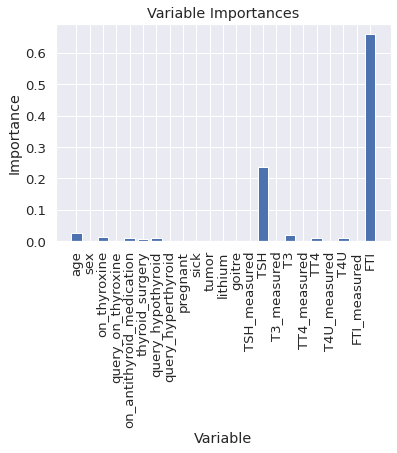

In [ ]:
# visualization of the feature importances
importances = list(status_gbc.feature_importances_)
# list of x locations for plotting
x_values = list(range(len(importances)))
# Making a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, gradient_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


According to the plot the most important features are FTI, and TSH 

followed by age, T3,on thyroxine, on_antithyroid_medication, thyroid_surgery, query_hypothyroid, TT4, and T4U. We will create another gradient boosting model model using these features and see if our model accuracy score improves. 

In [ ]:
important_features = ['FTI', 'TSH', 'age', 'T3', 'on_thyroxine','on_antithyroid_medication', 
                     'thyroid_surgery', 'query_hypothyroid', 'TT4', 'T4U']
X = cleaned[important_features].values
y = cleaned['status'].values
# training data using 80% of our data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# assigning number of trees to use to a variable
target_number_of_trees =100
# creating a gradient booster classifier and fitting the model to our data
new_status_gbc = GradientBoostingClassifier(n_estimators = target_number_of_trees, learning_rate = 0.1, max_depth=5, warm_start = True)
new_status_gbc = new_status_gbc.fit(X_train, y_train)

# making prediction using the model that we have trained

new_status_gbc_pred = new_status_gbc.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Prediction': new_status_gbc_pred.flatten()})
print(comparison.describe())

# evaluating the model using the accuracy score and confusion matrix
print('Accuracy score for this gradient boosting classifier with important features only =', 
      metrics.accuracy_score(y_test, new_status_gbc_pred) * 100,'%')
# using confusion matrix

           Actual  Prediction
count  400.000000   400.00000
mean     0.922500     0.91750
std      0.267718     0.27547
min      0.000000     0.00000
25%      1.000000     1.00000
50%      1.000000     1.00000
75%      1.000000     1.00000
max      1.000000     1.00000
Accuracy score for this gradient boosting classifier with important features only = 98.0 %


Comparing the perfomance for the new gradient boosting model (where we used important features only) with the one earlier (where we used the entire dataset), the new gradient boosting model has the same accuracy score as the one earlier. This goes to show that we dont need all the columns from the dataset, the important features are sufficient to build a good predictive model with high accuracy of 98.0%

### Support vector machines

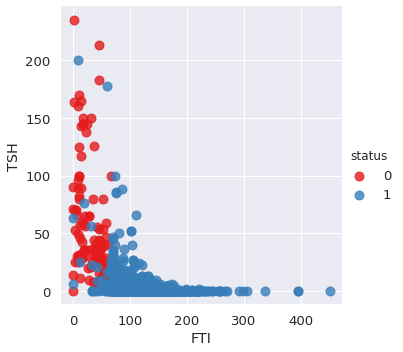

In [ ]:
# Thorough cleaning of the data is already completed and documented in the cleaning section. our data is ready for SVM
# let's create a copy of dataframe for this section

svm = cleaned.copy()
# Plotting our desired features for visualization
sns.lmplot('FTI','TSH', data=svm, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 80})

In [ ]:
# Specify the input for the model
fti_tsh = svm[['FTI', 'TSH']].to_numpy()
label = svm['status']
# applying a linear fuction to build the svm model
model = SVC(kernel= 'linear')
clf_model = model.fit(fti_tsh,label)

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('patient with or without hypothyroidism classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = fti_tsh[:, 0], fti_tsh[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=type_label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlabel('FTI')
ax.set_ylabel('TSH')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

I was trying to create a visualization here but everytime I ran the code, my computer would crash

In [ ]:
# making predictions

def FTI_or_TSH(FTI, TSH):
    if(model.predict([['FTI', 'TSH']]))==0:
        print('the status of the patient is negative.')
    else:
        print('the status of the patient is hypothyroid')


In [ ]:
# preparing the data for linear, polynomial and rbf functions

# applying reduction algorithm so that we are able to plot the graph on a 2_dimensional graph

# Removing the target column
svm_data= svm.drop('status', axis=1)
print(svm)
y = svm['status']
print(y)

# Applying the reduction algorithm: PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(svm_data)
print(pca)
X = pca.transform(svm_data)
print(X)
X.shape

      status  age  sex  on_thyroxine  ...  T4U_measured   T4U  FTI_measured    FTI
0          0   72    2             0  ...             1  1.48             1   10.0
1          0   15    1             1  ...             1  1.13             1   17.0
2          0   24    2             0  ...             1  1.00             1    0.0
4          0   77    2             0  ...             1  1.28             1   44.0
5          0   85    1             0  ...             1  1.19             1   23.0
...      ...  ...  ...           ...  ...           ...   ...           ...    ...
3158       1   58    1             0  ...             1  0.91             1   95.0
3159       1   29    1             0  ...             1  1.01             1   98.0
3160       1   77    2             0  ...             1  0.68             1  104.0
3161       1   74    1             0  ...             1  0.48             1  137.0
3162       1   56    1             1  ...             1  0.97             1  143.0

[19

(1998, 2)

#### Fitting polynomial function

In [ ]:
#  Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [106]:
# Building the model with polynomial function
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')

In [107]:
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [109]:
# making predictions
status_pred = polyclassifier.predict(X_test)

In [110]:
# Evaluating the model
print( accuracy_score(y_test, status_pred))

0.9675


The accuracy score for the polynomial function  is at 96.75%

#### Fitting radial basis function(rbf)

In [108]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
# making predictions using rbf

rbf_status_pred = rbfclassifier.predict(X_test)

In [112]:
# evaluating the model using accuracy score
print('rbf accuracy score =',accuracy_score(y_test, rbf_status_pred)*100,'%')

rbf accuracy score = 96.75 %


the accuracy score for rbf function is also at 96.75%

#### Fitting a linear function

In [115]:
# Building the model 
linear = SVC(kernel='linear')
# Training the model using the training set
linear.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
# making predictions using rbf

linear_status_pred = linear.predict(X_test)

In [117]:
# evaluating the model using accuracy score
print('linear accuracy score =',accuracy_score(y_test, linear_status_pred)*100,'%')

linear accuracy score = 97.25 %


linear model is perfoming the best with an accuracy score of 97.25% followed by rbf and polynomial which have the same accuracy score of 96.75%. Eventhough polynomial and rbf had the same accuracy score, running rbf was much faster than polynomial. My best model choice among SVM models would be rbf because of how fast it is compared to linear and polynomial.

## challenging the solution

My models from decison trees performed really well with very high accuracies of up to 98.75 %, is this too high to suggest overfitting? To improve on these models, I would test the model with a larger test size sample maybe 30% and then evaluate it's perfomance

As for support vector machines, I also got good percent accuracies of up to 97.25% which is great but building the models took a long time to complete running the codes time, except for rbf which was faster. To improve on running time for polynomial and linear functions, I would use the most important features from decision trees to build these models. This might also improve on the accuracies.

## Conclusion

After exploring on different models with decision trees and support vector machines. I would recommend gradient boosting model as the best model to use for this particular problem. It had the highest accuracy. In addition, the model could be improved further with more hyperparameter tuning . 